## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [4]:
#写入代码
data = pd.read_csv('clear_data.csv')
train = pd.read_csv('train.csv')


In [5]:
X = data
y = train['Survived']

In [8]:
#写入代码
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,stratify = y)


### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结

交叉验证是一种用于评估机器学习模型性能的技术。交叉验证的目标是评估模型在未见数据上的性能。它通过将数据划分为多个子集、在某些子集上训练模型并在其他子集上对其进行评估来实现这一点。

有几种类型的交叉验证技术，包括：

K折交叉验证：将数据分成k个子集（folds），模型在k-1个子集上训练，剩下的子集用于评估。这个过程重复 k 次，每个子集被用作评估集一次。

留一交叉验证：模型在除一个样本之外的所有样本上进行训练，留出的样本用于评估。对数据集中的每个样本重复此过程。

分层交叉验证：当数据不平衡时使用此技术，在这种情况下，通过保留每个类别的样本百分比来进行折叠。

#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

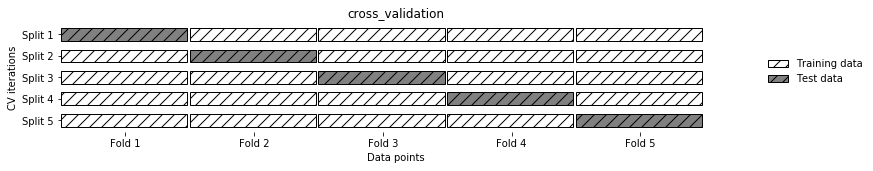

In [9]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [12]:
#写入代码
from sklearn.model_selection import cross_val_score # 通过交叉验证评估分数。
lr = LogisticRegression().fit(X_train,y_train)
score = cross_val_score(lr,X_train,y_train, cv=10)
print(score)

[0.79104478 0.71641791 0.79104478 0.73134328 0.91044776 0.7761194
 0.88059701 0.76119403 0.81818182 0.77272727]


/home/klmyty/code/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/klmyty/code/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [13]:
score.mean()

0.794911804613297

#### 思考4
* k折越多的情况下会带来什么样的影响？

In [14]:
#思考回答
score = cross_val_score(lr,X_train,y_train, cv=5)
print(score.mean())


0.7979575805184604


/home/klmyty/code/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/klmyty/code/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

在交叉验证中有更多的折叠可以使性能估计更加稳健，因为它允许模型在更大比例的数据上进行训练，这有助于减少任何可能是异常值或具有异常值的单个样本的影响。

从上面可以看到折数高反而分数下降了

折叠太多会导致过度拟合。例如，如果您的数据集很小，并且使用了太多折叠，则每次折叠的大小都会很小，模型可能无法很好地泛化。

#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

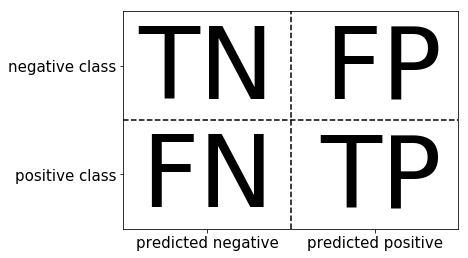

In [40]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

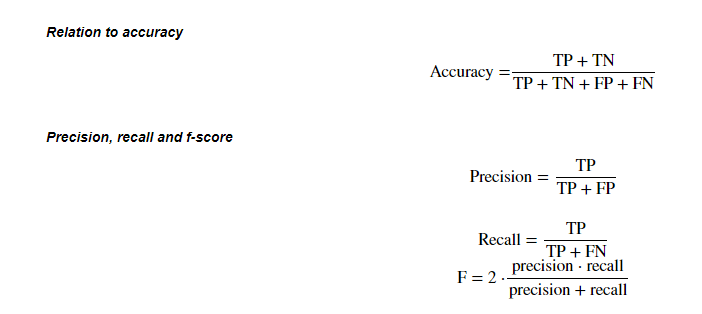

In [42]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

准确率（accuracy）= 预测正确的样本数/总样本数

精确率（precision） = 真的正类/（真的正类+假的正类之和） 即预测为正的样本

召回率（recall) = 真的正类/(真的正类+假的负类) 即实际为正的样本

#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

In [15]:
from sklearn.metrics import confusion_matrix

In [26]:
y_pred = lr.predict(X_train)

In [ ]:
confusion_matrix(y_train,y_pred,labels=[0,1])

In [22]:
y_train.value_counts(),357+55,79+177

(0    412
 1    256
 Name: Survived, dtype: int64,
 412,
 256)

死亡人数412人，幸存人数257人

混淆矩阵的意思为：

成功预测了357人死亡，177人幸存，错误预测了55人死亡，79人幸存

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred,target_names=['死亡','幸存']))

              precision    recall  f1-score   support

          死亡       0.82      0.87      0.84       412
          幸存       0.76      0.69      0.73       256

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.78       668
weighted avg       0.80      0.80      0.80       668



In [23]:
#分别计算准确率，精确率，召回率以及f1分数

# Evaluate the model's performance using metrics such as accuracy, precision, recall, F1 score, etc.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# Calculate the precision of the model
precision = precision_score(y_train, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the recall of the model
recall = recall_score(y_train, y_pred)
print("Recall: {:.2f}".format(recall))

# Calculate the F1 score of the model
f1 = f1_score(y_train, y_pred)
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Precision: 0.76
Recall: 0.69
F1 Score: 0.73


【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

混淆矩阵就是用来计算准确率，精确率，召回率的矩阵。

如果是多分类问题就是一类和其他类来进行计算即可。

使用f1分数来避免精确率和召回率的冲突

#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是ROC曲线，ROC曲线的存在是为了解决什么问题？

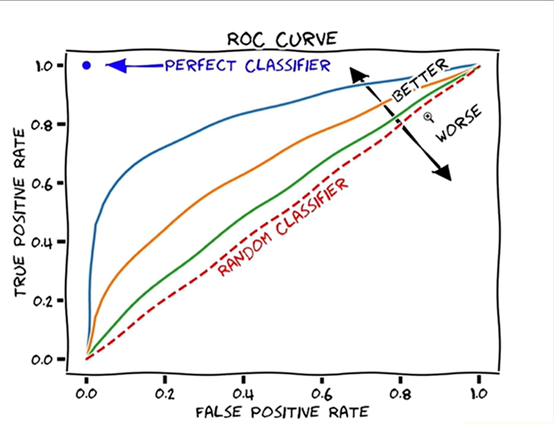

In [35]:
#思考
Image('ROC curve.png')

曲线越凸证明分类的越好

ROC用于解决形成多个模型后，会有多个混淆矩阵不利于观测，故使用ROC曲线

#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好

In [36]:
#写入代码
from sklearn.metrics import roc_curve

In [40]:
# 置信度分数
lr_df = lr.decision_function(X_test) 

In [42]:
fpr,tpr,thresholds = roc_curve(y_test, lr_df, pos_label=1)
fpr,tpr,thresholds # thresholds 是用来判断正负类边界值的

(array([0.        , 0.        , 0.        , 0.00729927, 0.00729927,
        0.01459854, 0.01459854, 0.05109489, 0.05109489, 0.08759124,
        0.08759124, 0.10948905, 0.10948905, 0.12408759, 0.12408759,
        0.13138686, 0.13138686, 0.13868613, 0.13868613, 0.16058394,
        0.16058394, 0.17518248, 0.17518248, 0.18248175, 0.18248175,
        0.18978102, 0.18978102, 0.22627737, 0.22627737, 0.23357664,
        0.23357664, 0.24817518, 0.24817518, 0.26277372, 0.26277372,
        0.27007299, 0.27007299, 0.28467153, 0.28467153, 0.31386861,
        0.31386861, 0.45985401, 0.45985401, 0.48175182, 0.48175182,
        0.49635036, 0.49635036, 0.5620438 , 0.5620438 , 0.59854015,
        0.59854015, 0.62043796, 0.62043796, 0.7080292 , 0.7080292 ,
        0.71532847, 0.71532847, 0.83941606, 0.83941606, 0.8540146 ,
        0.8540146 , 0.89781022, 0.89781022, 0.91240876, 0.91240876,
        1.        ]),
 array([0.        , 0.01162791, 0.03488372, 0.03488372, 0.36046512,
        0.36046512, 0.4883

Text(0, 0.5, 'True positive rate')

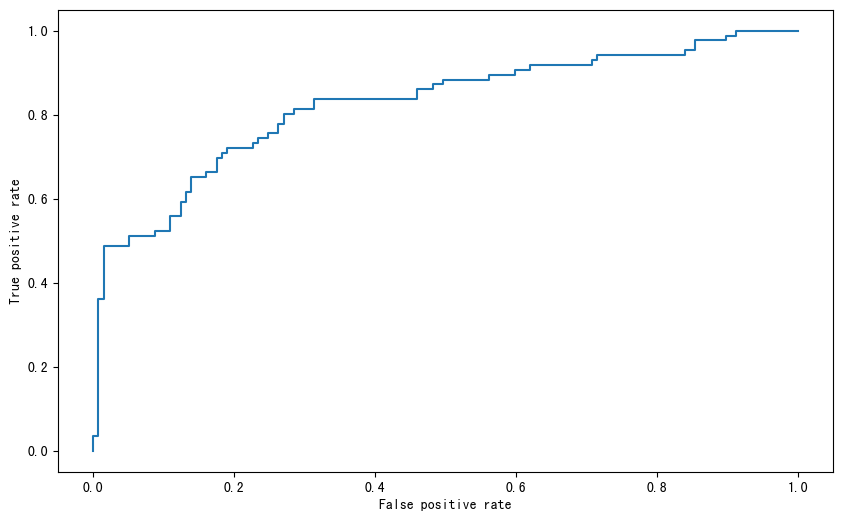

In [44]:
#写入代码
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


In [45]:
#写入代码
np.abs(thresholds)


array([4.34711887, 3.34711887, 3.04489961, 2.91671972, 1.27643551,
       1.24994637, 0.82072346, 0.64650038, 0.61286982, 0.53476927,
       0.53403384, 0.51204066, 0.48855985, 0.46497038, 0.44907753,
       0.43951874, 0.43409672, 0.42996268, 0.3539946 , 0.32602495,
       0.26124794, 0.16932768, 0.12646008, 0.078947  , 0.13339377,
       0.32755328, 0.32825584, 0.41125144, 0.42538671, 0.43186851,
       0.54840287, 0.57185813, 0.57255151, 0.61399295, 0.67243075,
       0.68594045, 0.6948818 , 0.72518805, 0.79698344, 0.95392918,
       1.01382269, 1.57375223, 1.64421396, 1.72555806, 1.73018661,
       1.75513763, 1.76438452, 1.88332817, 1.88387924, 1.91092613,
       1.91144059, 1.94550235, 1.94644828, 2.00642804, 2.00776457,
       2.01241716, 2.02187961, 2.1501171 , 2.15312543, 2.16948365,
       2.18452062, 2.2301414 , 2.23184345, 2.26963113, 2.27152919,
       2.85390999])

In [47]:
close_zero = np.argmin(np.abs(thresholds))

Text(0.5, 1.0, 'LR ROC')

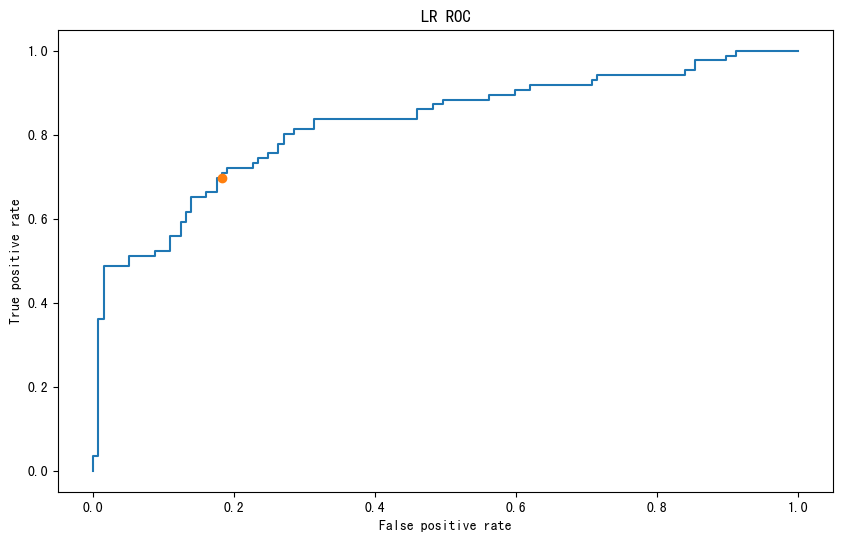

In [50]:
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr[close_zero],tpr[close_zero],'o')
plt.title('LR ROC')

#### 思考6
* 对于多分类问题如何绘制ROC曲线

In [54]:
lr = LogisticRegression().fit(X_train, y_train) 
lr1 = LogisticRegression(C=1000).fit(X_train, y_train) 
lr2 = LogisticRegression(class_weight='balanced').fit(X_train, y_train) 

/home/klmyty/code/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/klmyty/code/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [56]:
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/home/klmyty/code/ML/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

视频中使用的sklearn.metrics.plot_roc_curve已经在新版本中被删除了

改用sklearn.metric.RocCurveDisplay.from_predictions或者sklearn.metric.RocCurveDisplay.from_estimator

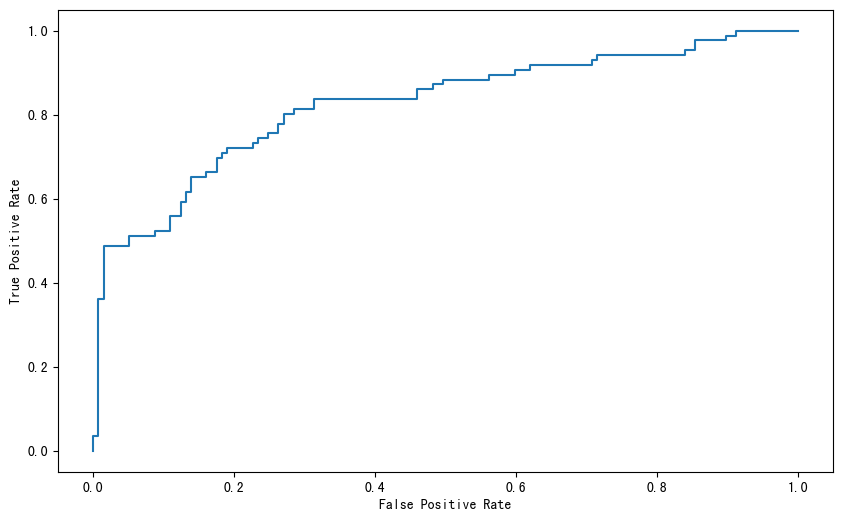

In [53]:
#写入代码
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()


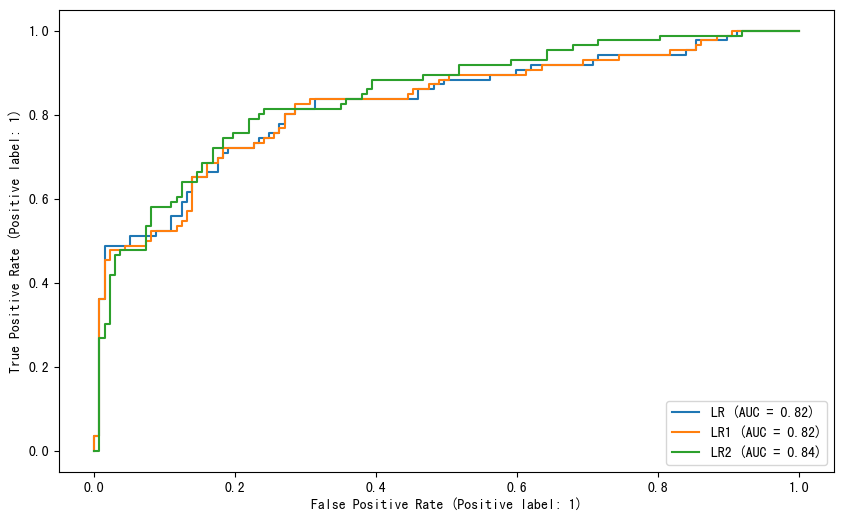

In [57]:
lr_display = RocCurveDisplay.from_estimator(lr, X_test, y_test,response_method='decision_function',name='LR')
RocCurveDisplay.from_estimator(lr1, X_test, y_test,response_method='decision_function',name='LR1',ax=lr_display.ax_)
RocCurveDisplay.from_estimator(lr2, X_test, y_test,response_method='decision_function',name='LR2',ax=lr_display.ax_)

【思考】你能从这条OCR曲线的到什么信息？这些信息可以做什么？

AUC为曲线下面积，面积越大越好

可以看到LR2的面积更大一些